<a href="https://colab.research.google.com/github/K3ny3tta/Group6_TelcoData/blob/main/Group6_Telco_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/takapia95/Group6_Telco_RF_Imbalance/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn(in).csv"
df = pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Shape of the data
print(df.shape[0], df.shape[1])

#Reshape data


7043 21


In [ ]:
#clean the data
df.dropna

#Churn is our target variable
#Creating column churn with conditions
# 1=Yes Churn 0=No Churn
df['Churn']= np.where(df['tenure']<= 1, '1','0')

#Lists the column names
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


In [ ]:
#freq of Churn and NoChurn
df['Churn'].value_counts()

,count
Churn,
0,6419
1,624


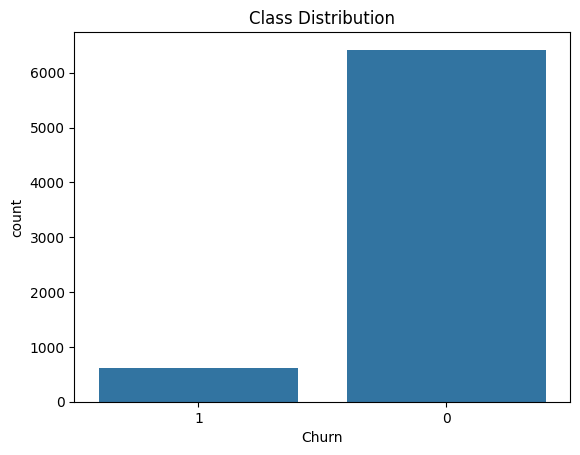

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
#selects numerical features
numerical_data = df.select_dtypes(include='number')
#putting the values in a list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
#selects categorical features
categorical_data = df.select_dtypes(include= 'object')
#putting the values in a list
categorical_features= categorical_data.columns.tolist()

print(f' There are {len (categorical_features)} categorical features:', '\n')

 There are 18 categorical features: 



In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
categorical_data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
numerical_data.var()

,0
SeniorCitizen,0.135875
tenure,603.168108
MonthlyCharges,905.410934


In [ ]:
numerical_data.skew()

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524


<function matplotlib.pyplot.show(close=None, block=None)>

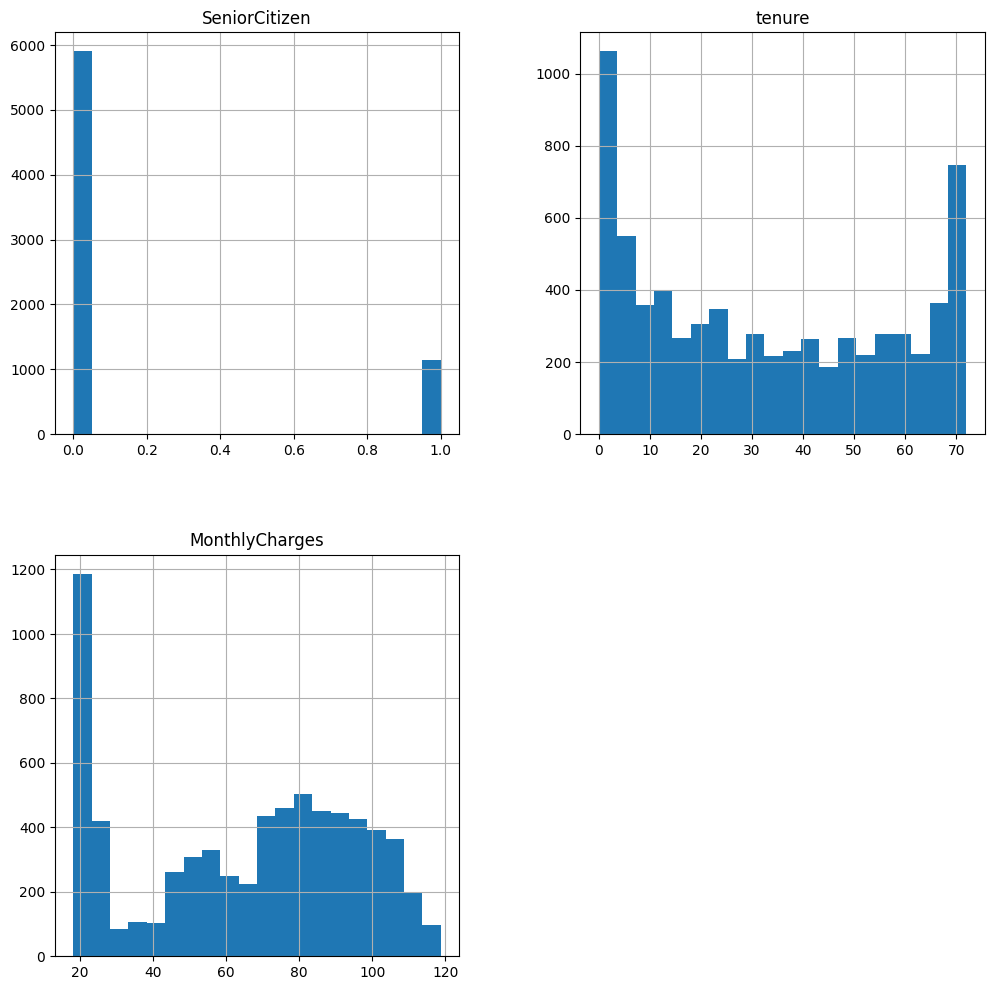

In [ ]:
numerical_data.hist(figsize=(12,12), bins=20)
plt.show

Create a contingency table to compare the frequency of the data to the target variable.

In [38]:
columns_of_interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for columns in columns_of_interest:
  print(f"\nValue Counts {columns}:")
  values, counts = np.unique(df[columns].values, return_counts=True)
  for v, c in zip(values, counts):
    print(f"{v}: {c}")


Value Counts gender:
Female: 3488
Male: 3555

Value Counts SeniorCitizen:
0: 5901
1: 1142

Value Counts Partner:
No: 3641
Yes: 3402

Value Counts Dependents:
No: 4933
Yes: 2110

Value Counts PhoneService:
No: 682
Yes: 6361

Value Counts MultipleLines:
No: 3390
No phone service: 682
Yes: 2971

Value Counts InternetService:
DSL: 2421
Fiber optic: 3096
No: 1526

Value Counts OnlineSecurity:
No: 3498
No internet service: 1526
Yes: 2019

Value Counts OnlineBackup:
No: 3088
No internet service: 1526
Yes: 2429

Value Counts DeviceProtection:
No: 3095
No internet service: 1526
Yes: 2422

Value Counts TechSupport:
No: 3473
No internet service: 1526
Yes: 2044

Value Counts StreamingTV:
No: 2810
No internet service: 1526
Yes: 2707

Value Counts StreamingMovies:
No: 2785
No internet service: 1526
Yes: 2732

Value Counts Contract:
Month-to-month: 3875
One year: 1473
Two year: 1695

Value Counts PaperlessBilling:
No: 2872
Yes: 4171

Value Counts PaymentMethod:
Bank transfer (automatic): 1544
Credit

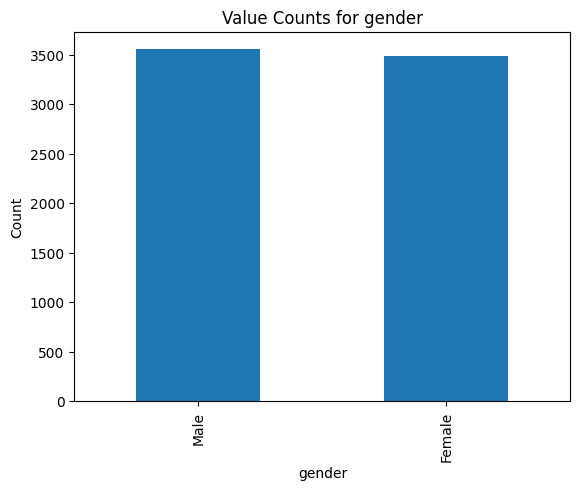

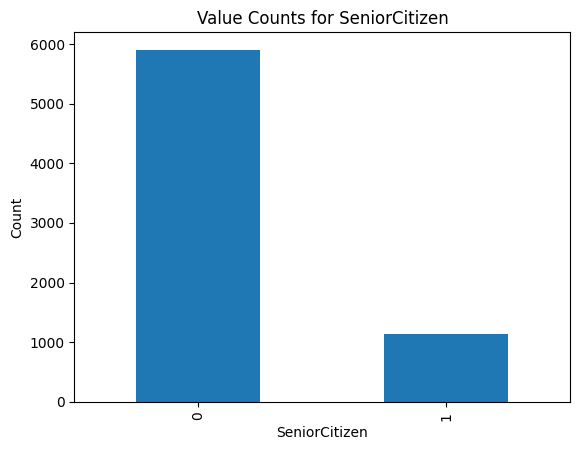

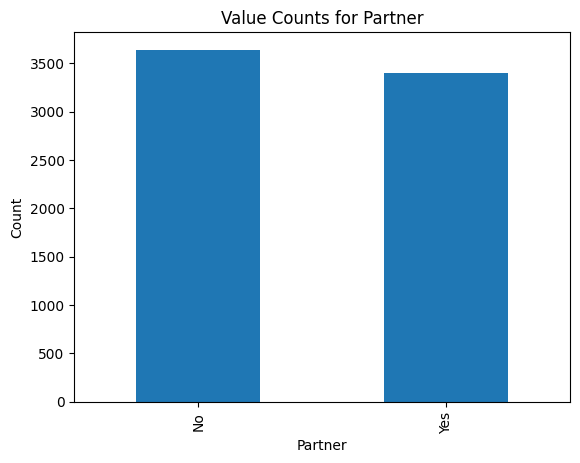

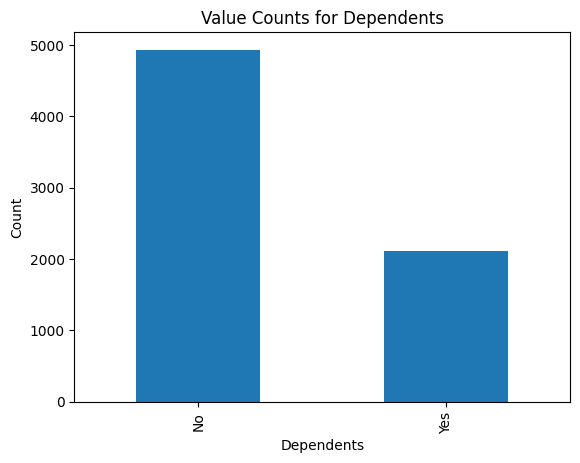

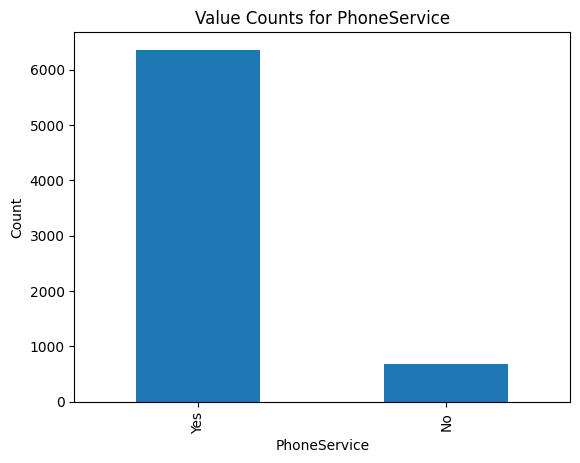

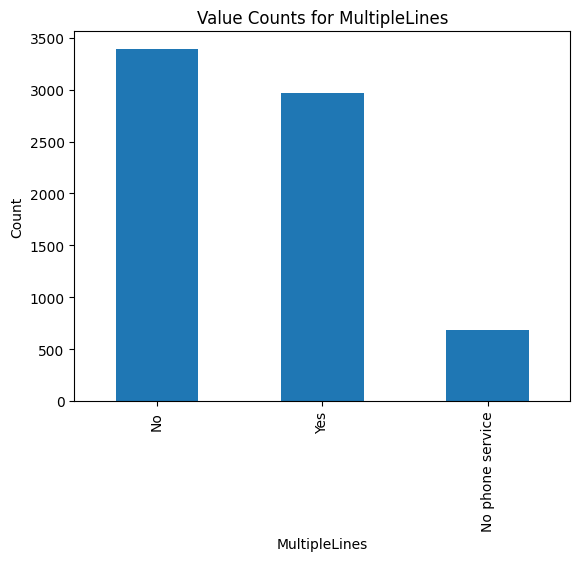

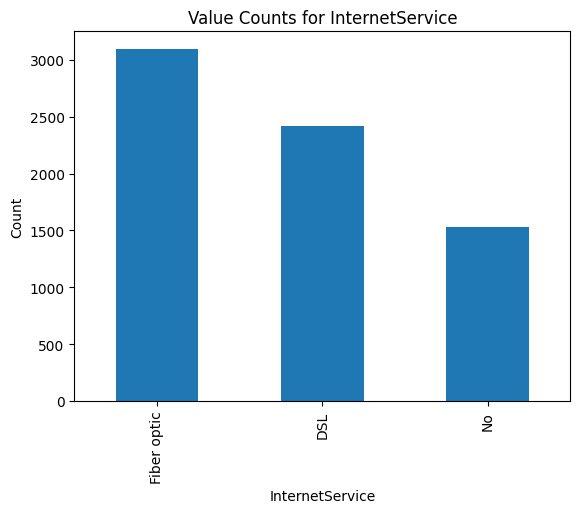

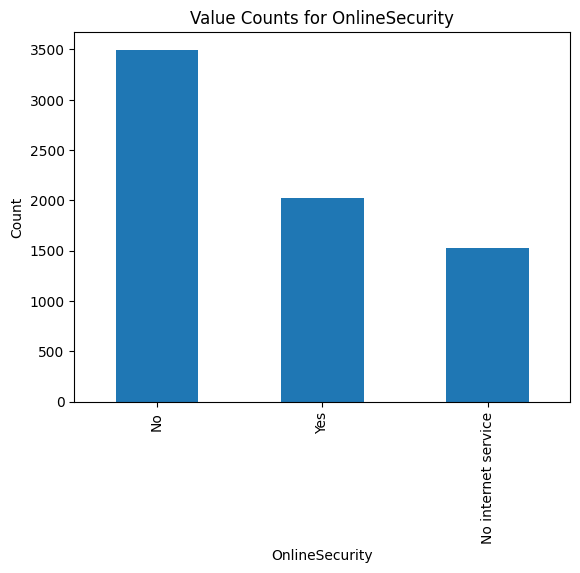

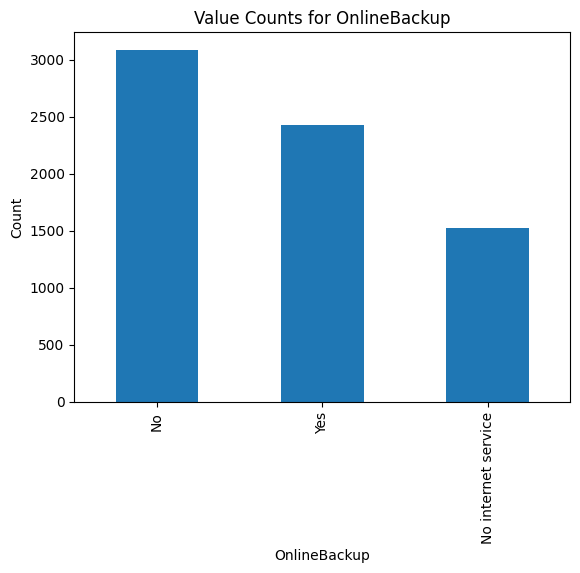

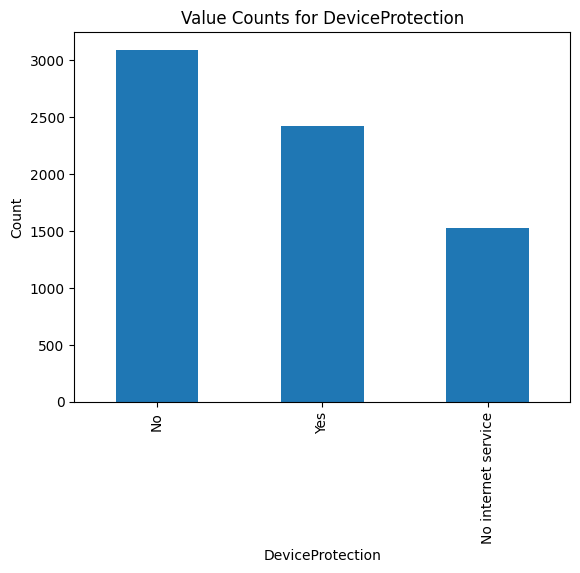

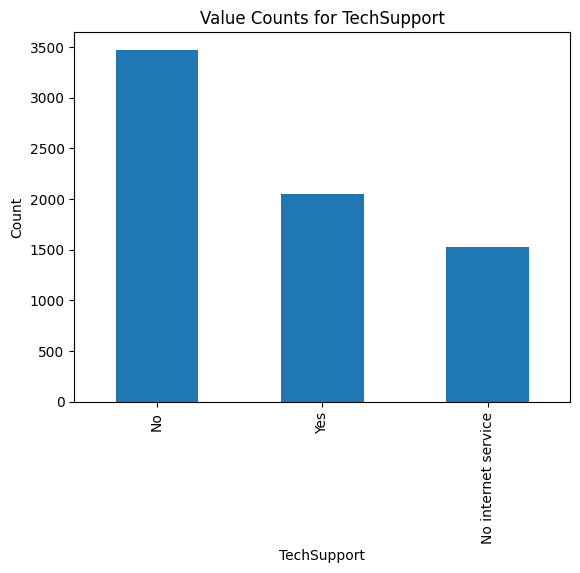

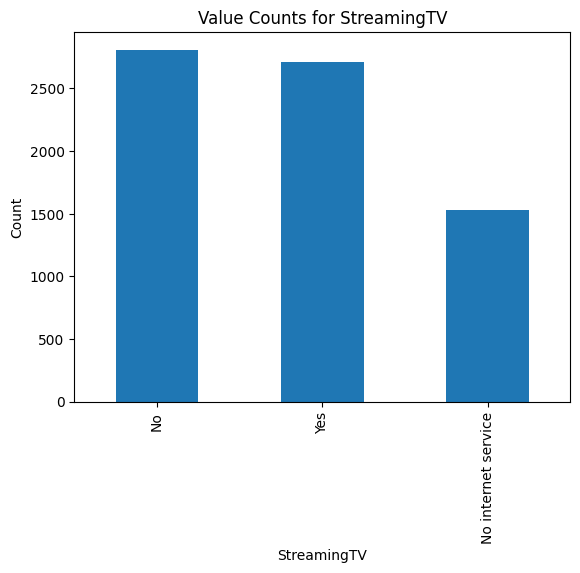

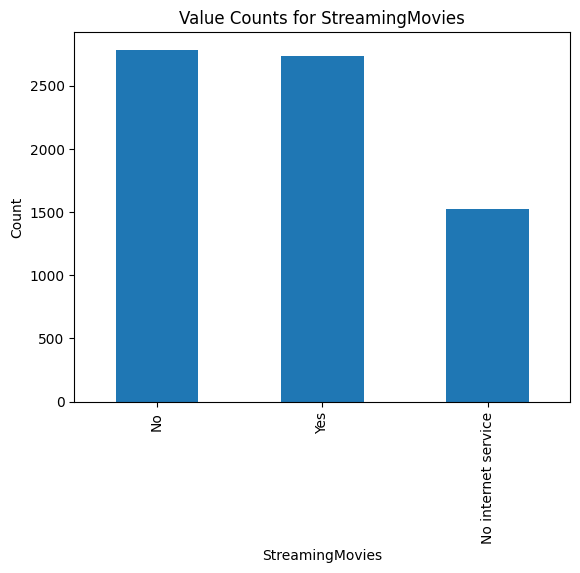

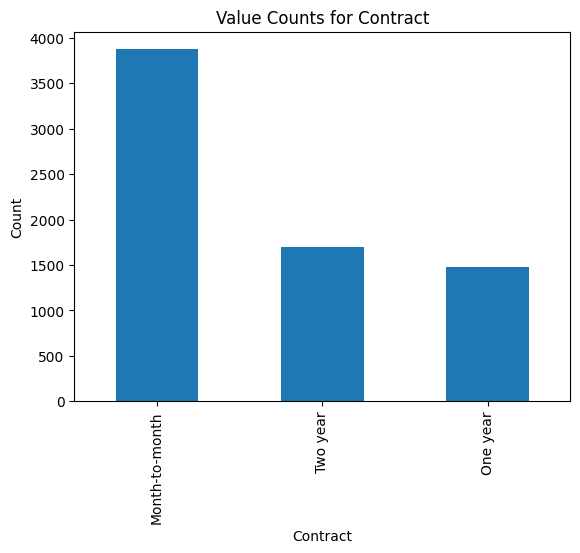

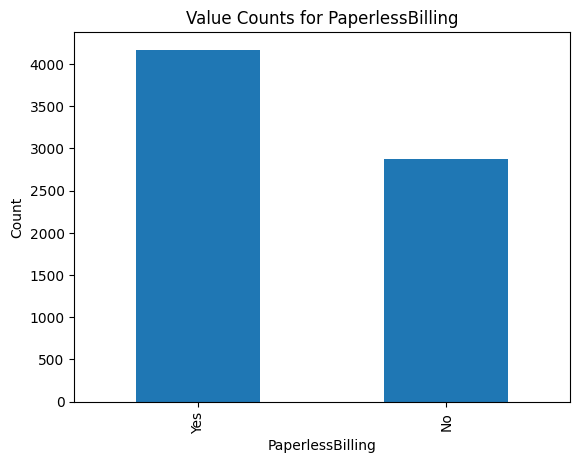

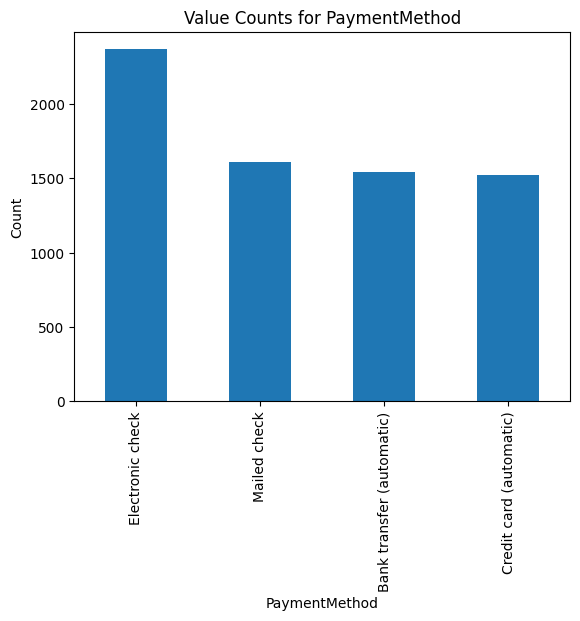

In [41]:

columns_of_interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for columns in columns_of_interest:
  df[columns].value_counts().plot(kind='bar')
  plt.title(f"Value Counts for {columns}")
  plt.xlabel(columns)
  plt.ylabel("Count")
  plt.show()

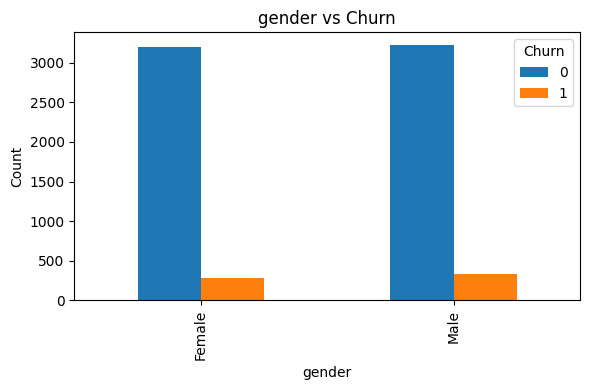

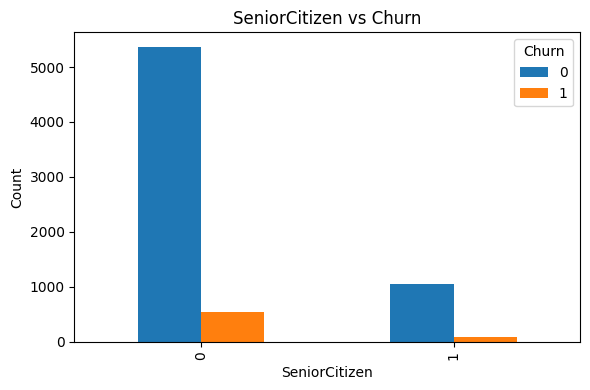

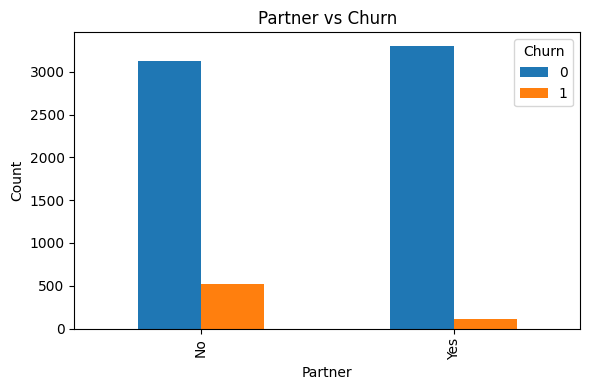

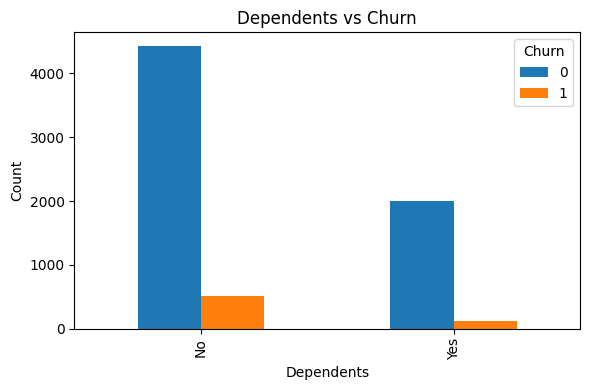

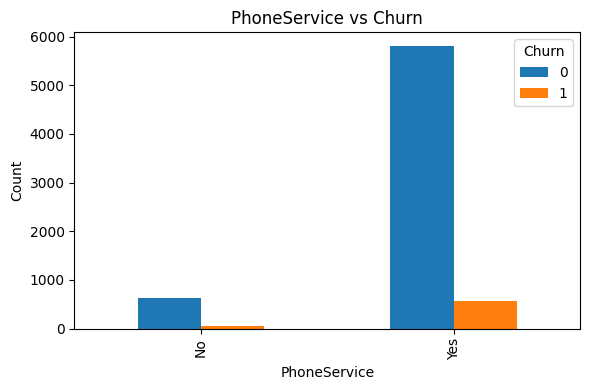

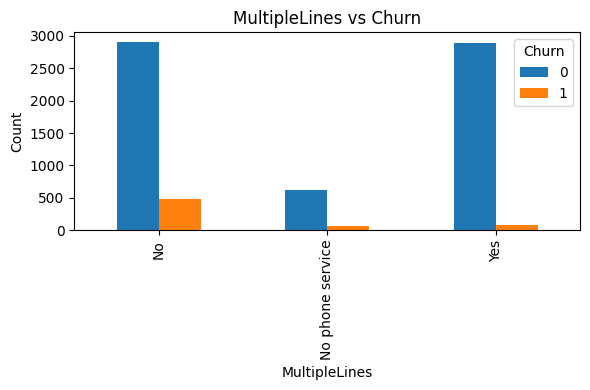

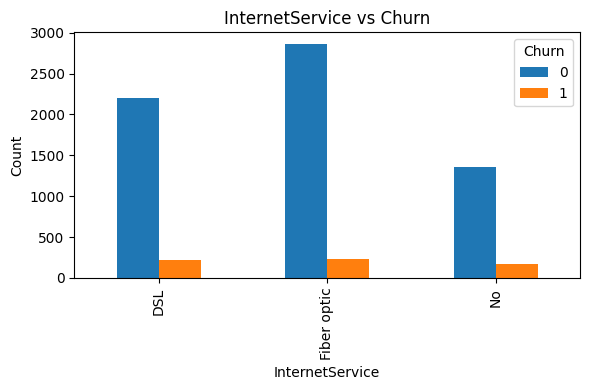

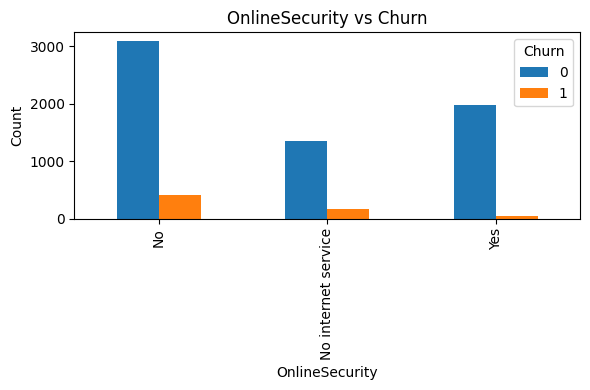

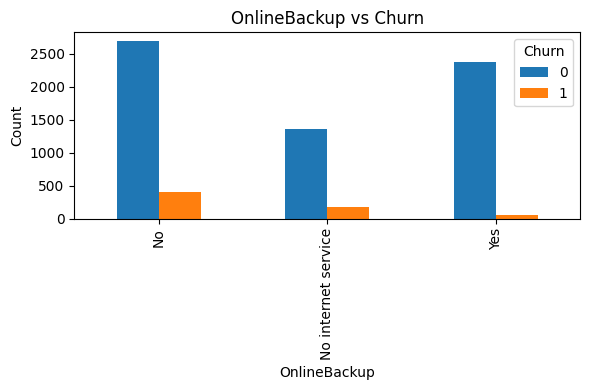

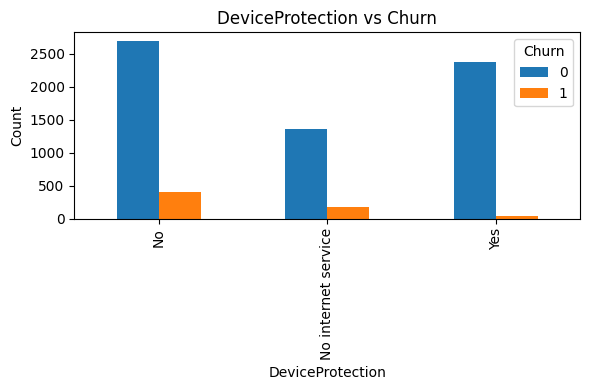

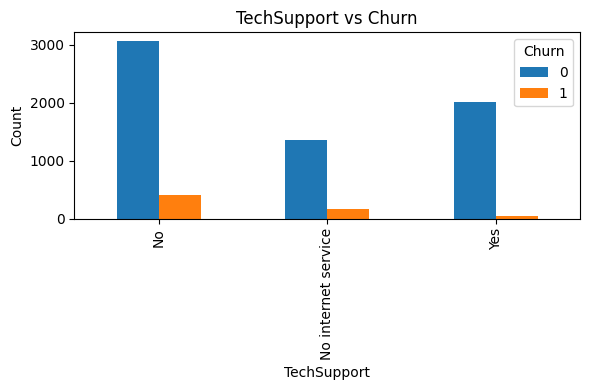

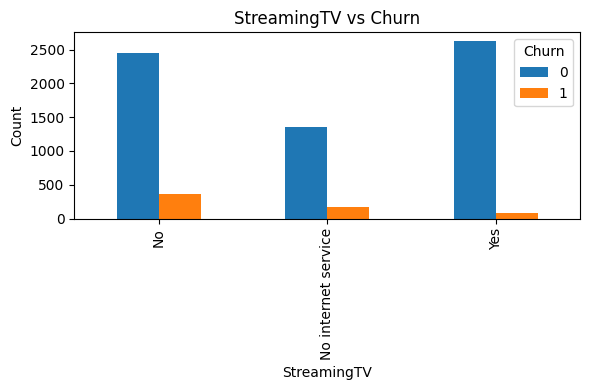

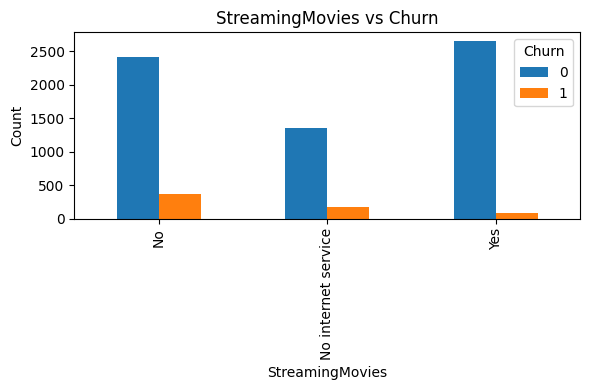

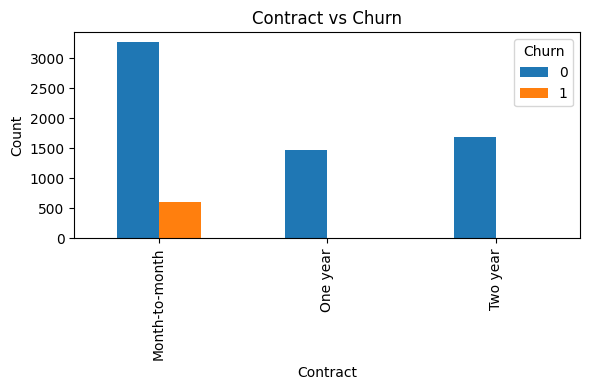

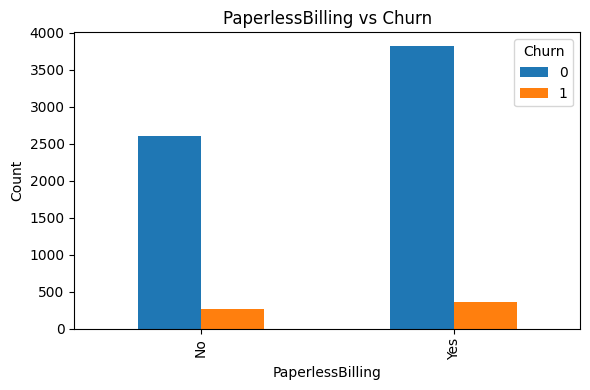

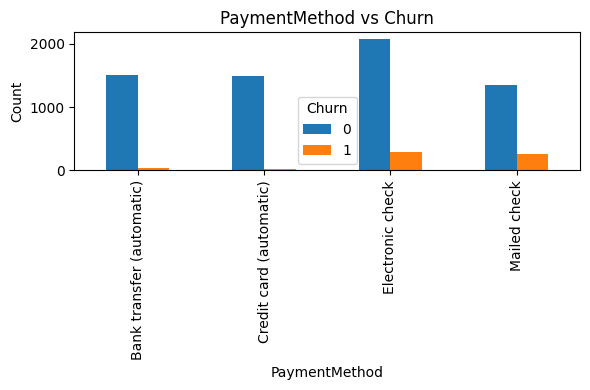

In [43]:

#1=YesChurn , 0= NoChurn
target = 'Churn'
columns_of_interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for columns in columns_of_interest:
  pd.crosstab(df[columns], df[target]).plot(kind='bar', figsize=(6,4))
  plt.title(f"{columns} vs {target}")
  plt.ylabel("Count")
  plt.xlabel(columns)
  plt.legend(title=target)
  plt.tight_layout()
  plt.show()